# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow.compat.v1 import set_random_seed
set_random_seed(404)

In [2]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline
%load_ext tensorboard

Using TensorFlow backend.


# Constants

In [3]:
image_width= 32
image_height= 32
image_pixels= image_height*image_width
color_channels=3
total_inputs=image_pixels*color_channels

valid_size=40000
xs_size=1000

# Get the Datat

In [4]:
(x_train_all, y_train_all),(x_tests,y_tests)=cifar10.load_data()

# Explore the Data

<h2> Try to make subplots with matplotlib

# The Challenge

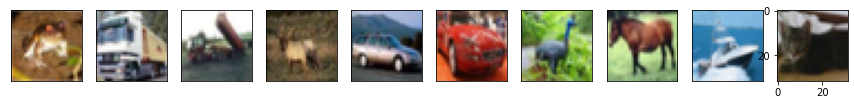

In [5]:
plt.figure(figsize=(15,5))
for x in range (10):
    plt.yticks([])
    plt.xticks([])
    plt.subplot(1,10,x+1)
    plt.imshow(x_train_all[x])

In [6]:
x_train_all[0][0][0]

array([59, 62, 63], dtype=uint8)

# Preprocessing Data and make it smaller by dividing by 255.0 and convert it to float numbers in range [0, 1]

# Scalling our Data

In [7]:
x_train_all, x_tests= x_train_all/255.0 ,x_tests/255.0

In [8]:
type(x_train_all[0][0][0][0])

numpy.float64

# Reshapr from 4d to 2d 

In [9]:
x_train_all=x_train_all.reshape(len(x_train_all),total_inputs)

In [10]:
x_train_all.shape

(50000, 3072)

In [11]:
x_tests=x_tests.reshape(x_tests.shape[0],total_inputs)

In [12]:
x_tests.shape

(10000, 3072)

## Create Validations Datasets

In [13]:
x_val=x_train_all[:valid_size]
y_val=y_train_all[:valid_size]

### take the rest to test

In [14]:
x_test=x_train_all[valid_size:]
y_test=y_train_all[valid_size:]

### make small Testpacks at first

In [15]:
x_test_xs=x_test[:xs_size]
y_test_xs=y_test[:xs_size]

# Define my first NN and build the first model

In [21]:
LOG_DIR='logs/'
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *

model_1= Sequential([
    Dense(units=128, input_dim=total_inputs, activation='relu',name='m1_hid1'),
    Dense(units=64, activation='relu',name='m1_hid2'),
    Dense(units=16, activation='relu',name='m1_hid3'),
    Dense(10, activation='softmax',name='m1_output')
])

model_1.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Setup TensorBoard

In [25]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths ,profile_batch=100000000)

# tsb = callbacks.TensorBoard(log_dir=dir_paths)


# Fit our Model and train it

## try another callback

In [28]:
from keras.callbacks import CSVLogger,RemoteMonitor,TensorBoard
csv_logger = CSVLogger('training.log')
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch=100000)
samples_per_batch=50
nr_epochs=1


# tensorboard_1 = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')


In [29]:
%%time
# cbks = [CustomCallback(), tsb]
try:
    model_1.fit(x_test_xs,y_test_xs,batch_size=samples_per_batch,epochs=nr_epochs,
    callbacks=[get_tensorboard("model 1")],
    validation_data=(x_val,y_val),
    verbose=0
    )
except:
        print("Oops!", sys.exc_info()[1], "occured.")
        print("Next entry.")
        print()

# model_1.save("ahmad_first.model")

Successfully created directory
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ahmad_first.model\assets
Wall time: 1.43 s
